# Advanced Image Classification

**Name:** Aman Chopra  
**Purdue Email:** chopra21@purdue.edu  
**[Github Repo](https://github.com/amanichopra/CNN-Classification)**

## Resources Used
- https://zhenye-na.github.io/2018/09/28/pytorch-cnn-cifar10.html
- https://www.tensorflow.org/tutorials/keras/save_and_load

## Features

- Constructed CNN with Keras for MNIST digits (99% accuracy), MNIST fashion (92% accuracy), CIFAR-10 (73% accuracy), CIFAR-100 fine (43% accuracy), and CIFAR-100 coarse (56% accuracy) datasets.
- Implemented support for saving and loading models to avoid retraining.
- Incorporated functionality for augmentation and random cropping of input data.

## Questions

**1) How is a CNN superior to standard ANNs for image processing?**

The main advantage of CNNs over standard ANNs for image processing is that they preserve the spatial interactions in images. They are also effective in capturing the relevant features of images, similar to process of human vision processing. Just like humans, CNNs begin with simple cells capturing high-level attributes and end with more complex cells capturing low-level attributes.

**2) Why do we sometimes use pooling in CNNs?**

Pooling is useful to help reduce the space complexity of the network and compute fewer parameters. It significantly reduces overhead during training, while still retaining the important features of the image. 

**3) Why do you think the cifar datasets are harder than mnist?**

The CIFAR datasets are harder to classify that MNIST probably due to the following reasons:
- CIFAR images are RGB unlike the black & white MNIST images, which adds more complexity.
- CIFAR images have varied backgrounds and orientations for the same objects. For example, airplanes in the dataset are in different settings and are pictured in different angles. 
- MNIST has much fewer class labels.

## Evaluation and Hyperparameter Tuning

Let's summarize the results on each dataset.

In [1]:
from CNN_tuning import getRawData, preprocessData, trainModel, runModel, evalResults

In [2]:
mods = {'mnist_d':None, 'mnist_f':None, 'cifar_10':None, 'cifar_100_c':None, 'cifar_100_f':None}
acc = {dataset: None for dataset in mods}
for dataset in mods:
    raw = getRawData(dataset)
    data = preprocessData(raw, dataset, 'tf_conv')
    model = trainModel(data[0], 'tf_conv', dataset, load=True)
    mods[dataset] = model
    preds = runModel(data[1], model, ALGORITHM='tf_conv')
    acc[dataset] = evalResults(data[1], preds, ALGORITHM='tf_conv')

Dataset: mnist_d
Shape of xTrain dataset: (60000, 28, 28).
Shape of yTrain dataset: (60000,).
Shape of xTest dataset: (10000, 28, 28).
Shape of yTest dataset: (10000,).
New shape of xTrain dataset: (60000, 28, 28, 1).
New shape of xTest dataset: (10000, 28, 28, 1).
New shape of yTrain dataset: (60000, 10).
New shape of yTest dataset: (10000, 10).
Building and training TF_CNN.
Testing TF_CNN.
Classifier algorithm: tf_conv
Classifier accuracy: 99.080000%

Dataset: mnist_f
Shape of xTrain dataset: (60000, 28, 28).
Shape of yTrain dataset: (60000,).
Shape of xTest dataset: (10000, 28, 28).
Shape of yTest dataset: (10000,).
New shape of xTrain dataset: (60000, 28, 28, 1).
New shape of xTest dataset: (10000, 28, 28, 1).
New shape of yTrain dataset: (60000, 10).
New shape of yTest dataset: (10000, 10).
Building and training TF_CNN.
Testing TF_CNN.
Classifier algorithm: tf_conv
Classifier accuracy: 92.920000%

Dataset: cifar_10
Shape of xTrain dataset: (50000, 32, 32, 3).
Shape of yTrain datas

Increasing the accuracy of the CNN was a tedious but rewarding task. At first, the CNN architecture for each dataset only had one convolution layer, followed by a dropout layer. This resulted in decent accuracy (95% for MINST datasets and 35%-50% for CIFAR datasets). To increase the accuracy further, I added more convolutional layers with increasing numbers of filters for each subsequent layer. Additionally, I added BatchNormalization layers to help with regularization and accelarating the training process. Lastly, despite the time complexity, I trained the CNNs for many epochs ~35. 

## CNN Architecture and Hyperparameters

**MNIST Digits**

In [3]:
mods['mnist_d'].summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 3, 3, 128)       

conv_1_num_filters: 32     
conv_2_num_filters: 64     
conv_3_num_filters: 128     
dropout: 0.2  
num_hidden_layers = 1  
neurons_per_hidden_layer = 256  
pool_size = 2x2

**MNIST Fashion**

In [4]:
mods['mnist_f'].summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_43 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_59 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 64)      

conv_1_num_filters: 32  
conv_2_num_filters: 32   
conv_3_num_filters: 64     
conv_4_num_filters: 128     
dropout: 0.2  
num_hidden_layers = 1  
neurons_per_hidden_layer = 256  
pool_size = 2x2

**CIFAR-10**

In [5]:
mods['cifar_10'].summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_47 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_48 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_63 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 64)      

conv_1_num_filters: 32  
conv_2_num_filters: 32   
conv_3_num_filters: 64     
conv_4_num_filters: 128     
dropout: 0.2  
num_hidden_layers = 1  
neurons_per_hidden_layer = 256  
pool_size = 2x2

**CIFAR-100 (Coarse Labels)**

In [6]:
mods['cifar_100_c'].summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_55 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_56 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_71 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 64)      

conv_1_num_filters: 32  
conv_2_num_filters: 32   
conv_3_num_filters: 64     
conv_4_num_filters: 128     
dropout: 0.2  
num_hidden_layers = 1  
neurons_per_hidden_layer = 256  
pool_size = 2x2

**CIFAR-100 (Fine Labels)**

For the CIFAR-100 dataset with fine labels, I used KerasTuner to optimize hyperparameters by building several models. The process is highlighted below.

```python
# note that data refers to the cifar_100_f dataset
def buildTuneModel(hp):
    mod = tf.keras.models.Sequential()
    mod.add(tf.keras.layers.Conv2D(filters=hp.Int('input_num_filters', min_value=32, max_value=256, step=32),       kernel_size=(3, 3), activation="relu", input_shape=data[0][0][0].shape))
    mod.add(tf.keras.layers.BatchNormalization())
    tf.keras.layers.Dropout(hp.Float('input_dropout',min_value=0.0,max_value=0.5,default=0.25,step=0.05))
    for i in range(hp.Int('num_conv_layers', 1, 5)):
        mod.add(tf.keras.layers.Conv2D(filters=hp.Int('conv_{i}_num_filters', min_value=32, max_value=256, step=32), kernel_size=(3, 3), activation="relu"))
        mod.add(tf.keras.layers.BatchNormalization())
        mod.add(tf.keras.layers.Dropout(hp.Float('conv_{i}_dropout',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
    mod.add(tf.keras.layers.Flatten())
    for i in range(hp.Int('num_hid_layers', 1, 5)):
        mod.add(tf.keras.layers.Dense(hp.Int('hid_{i}_num_neurons', min_value=32, max_value=256, step=32), activation="relu"))
        mod.add(tf.keras.layers.BatchNormalization())
        mod.add(tf.keras.layers.Dropout(hp.Float('hid_{i}_dropout',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
    mod.add(tf.keras.layers.Dense(data[0][1].shape[1], activation=tf.nn.softmax))
    mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return mod
```

```python
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import pickle
```

```python
tuner = RandomSearch(buildTuneModel, objective='val_accuracy', max_trials=20, executions_per_trial=2)
tuner.search_space_summary()
tuner.search(x=data[0][0], y=data[0][1], epochs=3, validation_data=data[1])
with open(f"tuner.pkl", "wb") as f:
    pickle.dump(tuner, f)
```

Now, let's load the tuner and identify the optimal hyperparameters.

In [9]:
import pickle
import tensorflow as tf

with open(f'tuner.pkl', 'rb') as f:
    tuner = pickle.load(f)
    
bestMod = tuner.get_best_models()[0]
bestHps = tuner.get_best_hyperparameters()[0]

In [10]:
bestMod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 192)       5376      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 192)       768       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 96)        165984    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 96)        384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 96)        83040     
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 96)        3

In [11]:
for hp in bestHps._hps.keys():
    print('{}: {}'.format(hp, bestHps.get(hp)))

input_num_filters: 192
input_dropout: 0.2
num_conv_layers: 2
conv_{i}_num_filters: 96
conv_{i}_dropout: 0.2
num_hid_layers: 2
hid_{i}_num_neurons: 160
hid_{i}_dropout: 0.05


## Visualizations

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
ann_acc = {'mnist_d':None, 'mnist_f':None, 'cifar_10':None, 'cifar_100_c':None, 'cifar_100_f':None}
for dataset in ann_acc:
    raw = getRawData(dataset)
    data = preprocessData(raw, dataset, 'tf_net')
    model = trainModel(data[0], 'tf_net', dataset, load=True)
    preds = runModel(data[1], model, ALGORITHM='tf_net')
    ann_acc[dataset] = evalResults(data[1], preds, ALGORITHM='tf_net')

Dataset: mnist_d
Shape of xTrain dataset: (60000, 28, 28).
Shape of yTrain dataset: (60000,).
Shape of xTest dataset: (10000, 28, 28).
Shape of yTest dataset: (10000,).
New shape of xTrain dataset: (60000, 784).
New shape of xTest dataset: (10000, 784).
New shape of yTrain dataset: (60000, 10).
New shape of yTest dataset: (10000, 10).
Building and training TF_NN.
Testing TF_NN.
Classifier algorithm: tf_net
Classifier accuracy: 98.020000%

Dataset: mnist_f
Shape of xTrain dataset: (60000, 28, 28).
Shape of yTrain dataset: (60000,).
Shape of xTest dataset: (10000, 28, 28).
Shape of yTest dataset: (10000,).
New shape of xTrain dataset: (60000, 784).
New shape of xTest dataset: (10000, 784).
New shape of yTrain dataset: (60000, 10).
New shape of yTest dataset: (10000, 10).
Building and training TF_NN.
Testing TF_NN.
Classifier algorithm: tf_net
Classifier accuracy: 88.910000%

Dataset: cifar_10
Shape of xTrain dataset: (50000, 32, 32, 3).
Shape of yTrain dataset: (50000, 1).
Shape of xTest

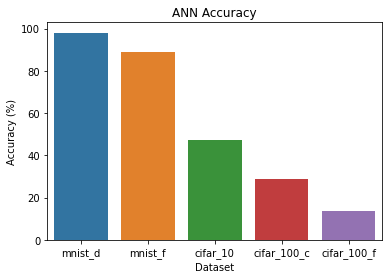

In [15]:
fig, ax = plt.subplots()
sns.barplot(x=list(ann_acc.keys()), y=[acc*100 for acc in ann_acc.values()])
plt.xlabel('Dataset')
plt.ylabel('Accuracy (%)')
plt.title('ANN Accuracy')
fig.savefig('ANN_Accuracy_Plot.pdf')

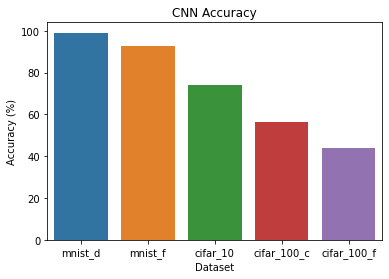

In [16]:
fig, ax = plt.subplots()
sns.barplot(x=list(acc.keys()), y=[acc*100 for acc in acc.values()])
plt.xlabel('Dataset')
plt.ylabel('Accuracy (%)')
plt.title('CNN Accuracy')
fig.savefig('CNN_Accuracy_Plot.pdf')